In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from pathlib import Path

In [2]:
save_path = Path('save/fhmm/0/results.pkl')

with open(save_path, 'rb') as f:
    results = pickle.load(f)
    true = results['logp_joint_real']
    joints = results['joints']
    recons = {s: np.log(np.array(r) / 500) for s, r in results['recons'].items()} # Divide by 500 to get the mean recons error across 500 samples

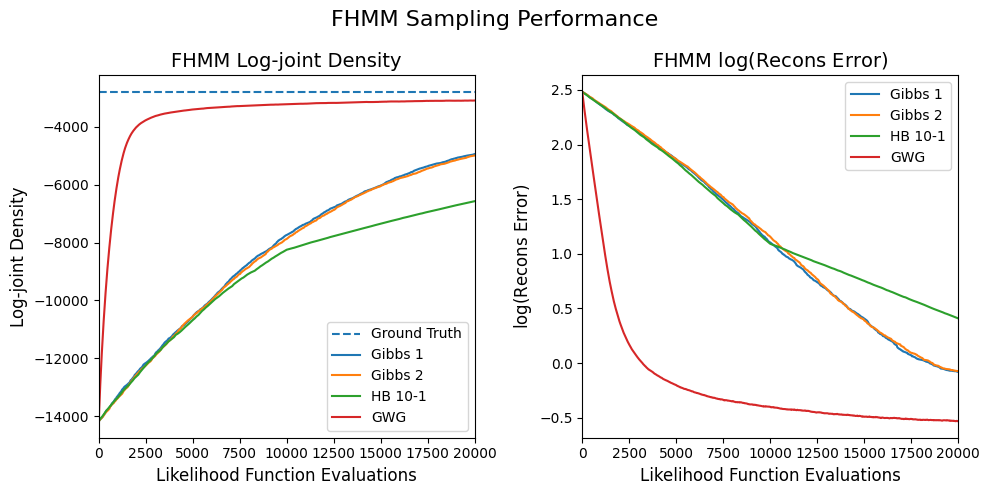

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

iterations = np.linspace(0, 10000, 1001)

axs[0].axhline(y=true, linestyle='--', label='Ground Truth')
axs[0].plot(iterations * 2, joints['bg-1'], label='Gibbs 1')
axs[0].plot(iterations * 4, joints['bg-2'], label='Gibbs 2')
axs[0].plot(iterations * 10, joints['hb-10-1'], label='HB 10-1')
axs[0].plot(iterations * 2, joints['gwg'], label='GWG')
axs[0].legend(loc='lower right')
axs[0].set_xlim(0, 20000)
axs[0].set_xlabel("Likelihood Function Evaluations", fontsize=12)
axs[0].set_ylabel("Log-joint Density", fontsize=12)
axs[0].set_title("FHMM Log-joint Density", fontsize=14)

axs[1].plot(iterations * 2, recons['bg-1'], label='Gibbs 1')
axs[1].plot(iterations * 4, recons['bg-2'], label='Gibbs 2')
axs[1].plot(iterations * 10, recons['hb-10-1'], label='HB 10-1')
axs[1].plot(iterations * 2, recons['gwg'], label='GWG')
axs[1].legend(loc='upper right')
axs[1].set_xlim(0, 20000)
axs[1].set_xlabel("Likelihood Function Evaluations", fontsize=12)
axs[1].set_ylabel(r"$\log(\text{Recons Error})$", fontsize=12)
axs[1].set_title(r"FHMM $\log(\text{Recons Error})$", fontsize=14)

fig.suptitle('FHMM Sampling Performance', fontsize=16)

plt.tight_layout()
plt.show()